<a href="https://colab.research.google.com/github/marcos-code/sigmoidal_datascience/blob/main/Projeto_Viol%C3%AAncia_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando a Violência do Rio de Janeiro


<center><img alt="Rio de Janeiro" width="40%" src="https://image.freepik.com/vetores-gratis/conceito-de-carnaval-brasileiro-com-pessoas-a-dancar-e-natureza_1284-27444.jpg")</p>




# Obtenção dos dados

Os dados foram disponibilizados pelo portal [ISPDADOS](https://http://www.ispdados.rj.gov.br/estatistica.html) no qual é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

A criação do portal ISPDados e a consequente consolidação dos dados históricos de criminalidade e atividade policial do estado exigiu um processo de revisão dos dados divulgados, com vistas à equalização de códigos de ocorrência contabilizados e agregados em cada título divulgado ao longo do tempo.

Sendo assim, o presente processo de revisão de dados é mais uma etapa do compromisso do ISP com a transparência e a qualidade dos dados oficiais da Segurança Pública do Estado do Rio de Janeiro. O dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente [neste link](http://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv)


#Importando os dados

In [16]:
# importando as bibliotecas e os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

#Analise dos dados

Antes de começar a explorar e analisar nosso dataset, temos que ter o conhecimento deles. Vamos enteder suas dimensões primeiramente e como estão estruturados.

In [4]:
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])


Variáveis:  56
Entradas:  344


Ao identificar a dimensão do conjunto de dados que estaremos manipulando, vamos ver todas as variáveis existentes dentro desse conjunto.


In [5]:
#imprimindo os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Depois de ver com quais variáveis estaremos trabalhando e qual tipo de informação que podemos tirar, é importante analisar cada tipo de variável contida no conjunto de dados. Através desse entendimento irá nos ajudar na fase de limpeza dos dos dados.


In [6]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Podemos analisar que as variáveis são do tipo numérico *int* e *float*

In [7]:
# olhando as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [45]:
#vendo as ultimas entradas do dataset
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Ao analisar os dataset, podemos perceber que existe variáveis com muitos  ausentes *NAN*


# Porcentagem de valores ausentes

In [8]:
# ver valores ausentes do dataset em ordem crescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) *100

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Ao analisar nossas variáveis vimos que alguma possuem uma porcentagem significativa de valores faltantes como roubos de bicicletas e apreensão de drogas por autor. Por meio dessas informações podemos analisar outras variáveis que estejam com os dados completos assim nos proporcionando uma melhor analise.

# Informações Estatísticas 
Usando o método describe() podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

Para nos ajudar a compreender os dados vamos plotar histograma.

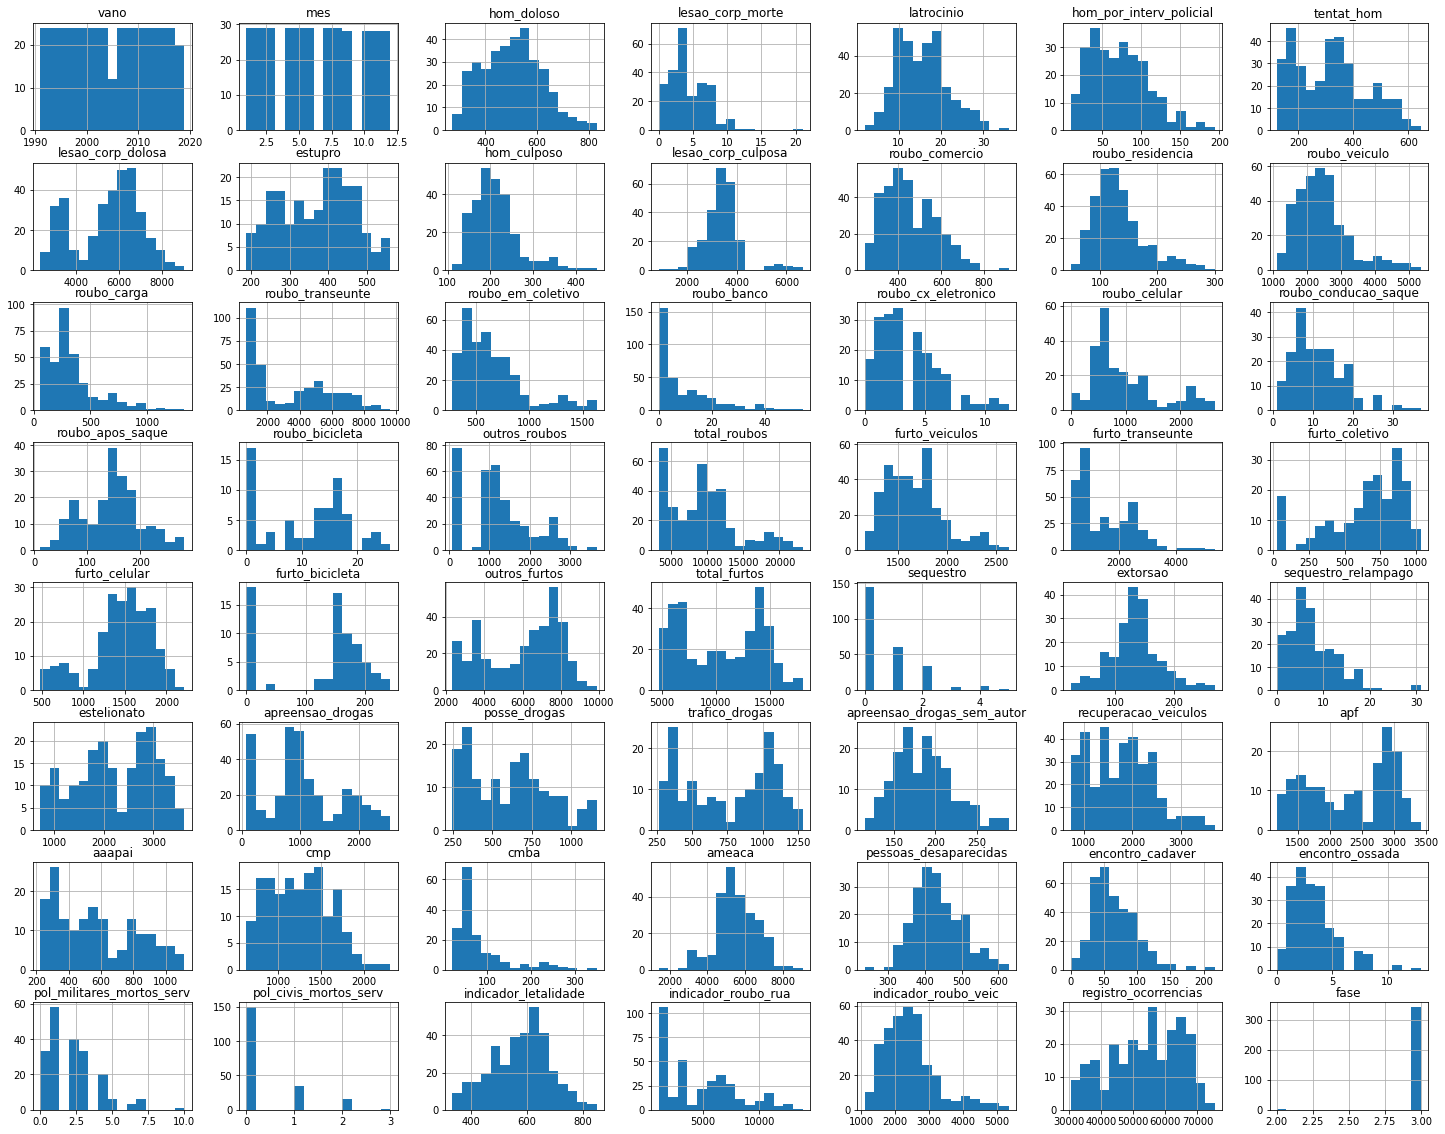

In [11]:
df.hist(bins=15, figsize=(25,20));

In [9]:
# Vendo o resultado estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

# Dados a ser analisados

Vamos dedicar essa seção do projeto para investigar dados em relação aos crimes de roubo e furto de veículos.

Problema comum nas grandes metrópoles brasileiras, esse tipo de crime merece destaque em nosso projeto. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

In [ ]:
# ver a media variável roubo_veiculo
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,1))

2448.7


Por mês podemos ver que a média variável de roubos de veículos é 2448.7

In [ ]:
# ver a média variável furto_veiculos
mean_furto_veiculos = df.furto_veiculos.mean()
print(round(mean_furto_veiculos,2))

1674.67


Em relação aos furtos, os números são um pouco menores, mas ainda altos. Foram registrados, em média, 1674.67 furtos de veículos por mês.

In [ ]:
#ver a media de recuperacao_veiculo
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(round(mean_recuperacao_veiculos,2))

1772.24


In [ ]:
#Total de veiculos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média de Veículos Perdidos por Mês: {:2f}'.format(total))
print('Veículos Recupedados por Mês: {:2f}'.format(mean_recuperacao_veiculos))

Média de Veículos Perdidos por Mês: 4123.369186
Veículos Recupedados por Mês: 1772.238372


In [ ]:
# ver porcentagem de veículos recuperados
pct = mean_recuperao_veiculos / total*100
print('{:2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

42.980347% dos veículos roubados ou furtados são recuperados.


# Crimes referente a Vida
Encontrando os valores máximos (max) e mínimos (min) da coluna hom_doloso

In [ ]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# exibir os valores máximos e mínimos
print("Max:\t{}".format(max_hom_doloso))
print("Min:\t{}".format(min_hom_doloso))


Max:	831
Min:	272


Com a analise acima podemos ver que teve um  mês com menor número de casos, onde foram registrados 272 homicídios dolosos.
 E em outro um valor com mais casos
registrados foram 831 homicídios dolosos no mês.




Verificar os meses de menor e maior numero de casos de homicídio doloso

In [ ]:
# verificando o mês com o menor número de homicídios doloso
df.loc[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


Podemos ver que em junho teve um menor índice de homicidio doloso 

In [ ]:
#verificando o mês com o maior número de homicídios doloso
df.loc[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Em janiero teve um maior índice de homicio doloso

#Vizualização de dados

Para que possamos entender melhor a distribuição dos dados, faremos uma analise em relação a varável *hom_doloso*


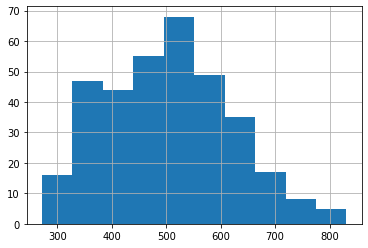

In [ ]:
df.hom_doloso.hist();

No gráfico acima, alguns dados chamam a nossa atenção, como:

Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.


Analisar a variavel roubo_em_coletivo utilizando grafico de linha



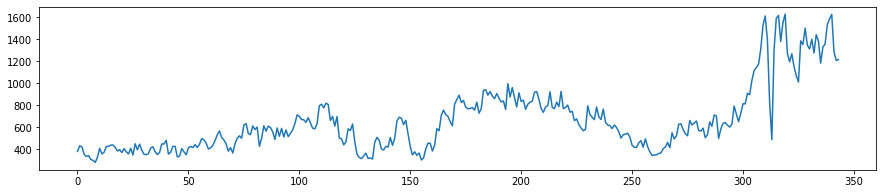

In [26]:
df.roubo_em_coletivo.plot(kind= 'line', figsize=(15,3));

# Conclusão

Após as analises feitas podemos perceber que roubos de carros no Rio de Janeiro ainda continua sendo umas das maiores ocorrências junto com homicidios dolosos. Mas ao longo dos anos podemos perceber esse índice vem baixando. 
Se olharmos para outros dados em nosso dataset vemos que lesão corporal dolosa teve um almento significatico de 1991 a 2019.
Infelizente esses números vem aumentado a cada dia, mas temos a esperança que tudo vai melhorar e podemoremos desfrutar do que a de melhor nessa cidade maravilhosa.
